In [1]:
# =============================================================================================

#  COMPREHENSIVE LIBRARY IMPORTS FOR HEART DISEASE ANALYSIS

# ========================================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder ,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve)

print("\n\n ============= ALL LIBRARIES IMPORTED SUCCESSFULLY!==============\n\n")



 ============= ALL LIBRARIES IMPORTED SUCCESSFULLY!==============




# 1. LOADING AND INSPECTING HEART FAILURE DATASET

In [2]:
# Loading the dataset
data = pd.read_csv('heart.csv')

print("\n Dataset Loaded Successfully!")
print(f'\n Dataset Shape : {data.shape[0]} rows * {data.shape[1]} columns ')

print("\n FIRST 10 ROWS OF THE DATASET")
data.head()



 Dataset Loaded Successfully!

 Dataset Shape : 918 rows * 12 columns 

 FIRST 10 ROWS OF THE DATASET


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
print("\nDATASET INFORMATION\n")
print(data.info())


DATASET INFORMATION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [4]:
print("\nSTATISTICAL SUMMARY\n")
data.describe()



STATISTICAL SUMMARY



,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Insights
### Age
- The median average age group of people are nearly 54.
- Around 75 percent of population are age group of 60.
### RestingBp
- The average RestingBP of the people are 132. which include minimum value 0 and maximum 200 which is outlier.
- 75 percent of population are suffering from high RestingBP i.e. 140 mm/Hg.
## Cholestrol
- 75 percent of people are suffering from high cholestrol
## Fasting BS
- most of the people having not suffereing from FastingBS more than 75 percent of population.

In [5]:
print("\n=============================================================================\n")
print("DATASET COLUMN NAMES")
print("\n=============================================================================\n")

print(data.columns)



DATASET COLUMN NAMES


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [6]:
print("\n================================================================================")
print("\nDATA QUALITY ASSESSMENT")
print("\n================================================================================")




DATA QUALITY ASSESSMENT



In [7]:
# Checking the balanced or imbalanced dataset
print("=================================================================================")
print("\n TARGET VARIABLE DISTRIBUTION")
print("\n==================================================================================")

print(data['HeartDisease'].value_counts())

print("\n DATASET IS BALANCED\n")


 TARGET VARIABLE DISTRIBUTION

HeartDisease
1    508
0    410
Name: count, dtype: int64

 DATASET IS BALANCED



In [8]:
data['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [9]:
data['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [10]:
data['FastingBS'].value_counts()

FastingBS
0    704
1    214
Name: count, dtype: int64

In [11]:
data['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [12]:
data['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [13]:
data['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

# 2. Data Cleaning     

In [14]:
# checking the missing values in the dataset
print("=================================================================================")
print("\n  MISSING VALUES ANALYSIS")
print("\n==================================================================================")

data.isna().sum()

print("\nNo missing values detected! Dataset is complete.\n")


  MISSING VALUES ANALYSIS


No missing values detected! Dataset is complete.



- There is no missing value in the dataset

In [15]:
# Checking Duplicate
print("=================================================================================")
print("\n  DUPLICATE ROWS ANALYSIS")
print("\n==================================================================================")

data.duplicated().sum()


  DUPLICATE ROWS ANALYSIS



np.int64(0)

- No duplicate rows found!

In [16]:
X = data.drop('HeartDisease',axis=1)
y = data['HeartDisease']

print(f'\nShape of X {X.shape} , Shape of y {y.shape}\n')


Shape of X (918, 11) , Shape of y (918,)



In [17]:
#Numerical Columns
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
#Categorical Columns
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
print(f'\n   Numerical Columns:\n {num_cols}')
print(f'\n   Categorical Columns:\n {cat_cols}')


   Numerical Columns:
 ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

   Categorical Columns:
 ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


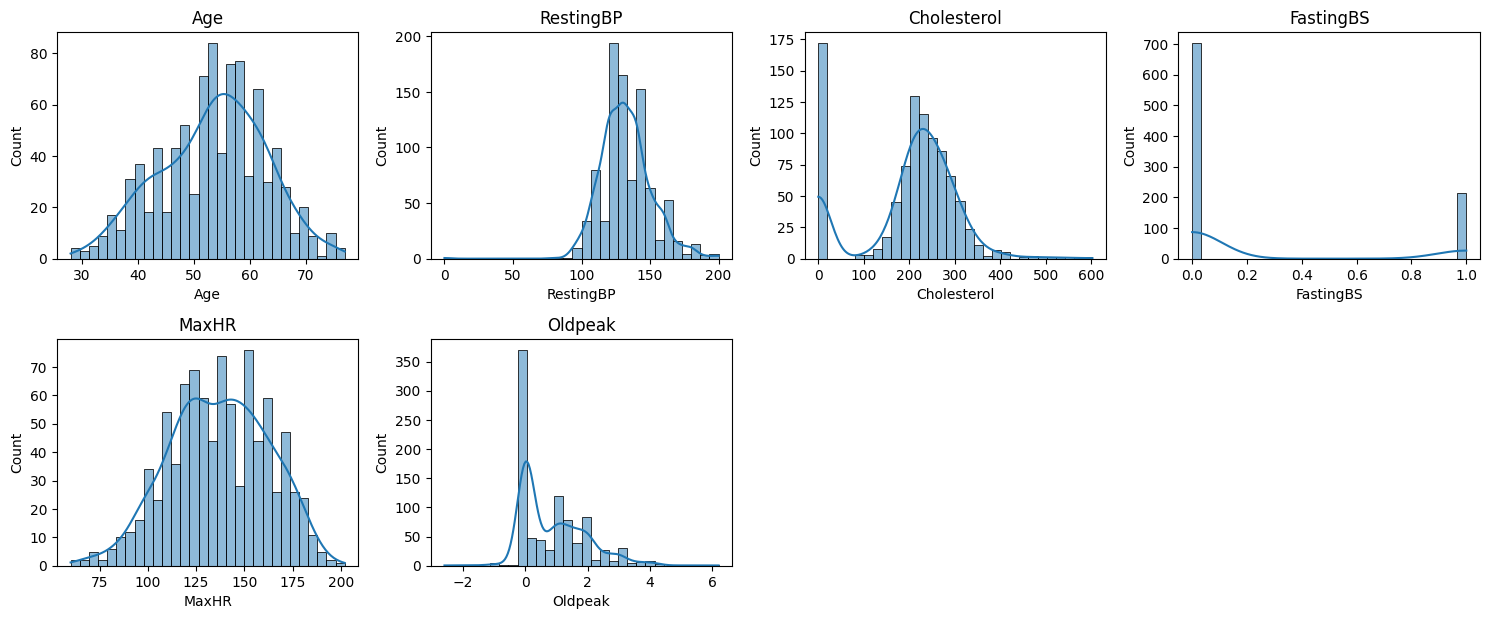

In [18]:
plt.figure(figsize=(15,12))
for i ,col in enumerate(X[num_cols].columns):
    plt.subplot(4,4,i+1)
    sns.histplot(X[col],bins=30,kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

<Axes: >

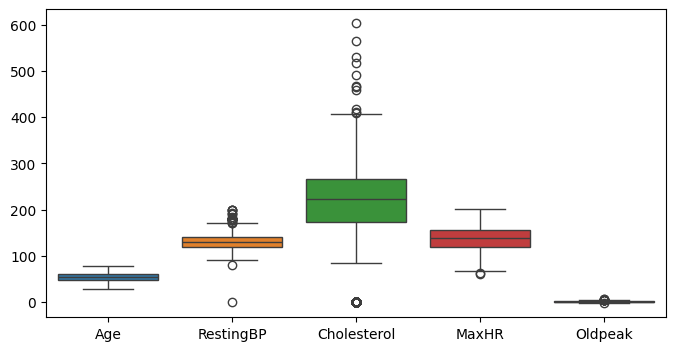

In [19]:
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(8,4))
sns.boxplot(data=X[num_cols])
# plt.title('Boxplot ')

In [23]:
# # Outlier Detection
# # Age is fineminimum is 28 and maximum is 77
# # RESTING BP < 40 AND RESTING BP > 250 ARE CONSIDERED AS OUTLIER
# # Cholesterol < 100 or Cholesterol > 400 → treated as outlier
# # Fasting BS are binary 0 and 1
# # Max HR are fine betwen 60 - 202
# # Oldpeak < 0 or Oldpeak > 6 → Outlier/Invalid

# # Counting the code for Domain Knowledge 
# # Resting BP outlier
# outlier_restingBP = X[(X['RestingBP'] < 40) | (X['RestingBP'] > 250)]
# # Cholestrol outliers
# outlier_chol = X[(X['Cholesterol'] < 100 ) | (X['Cholesterol'] > 400) ]
# # Oldpeak outlier
# outlier_oldpeak = X[(X['Oldpeak'] < 0 ) | (X['Oldpeak'] > 6 )]

# # Count total outlier
# print("RestingBP outliers:",len(outlier_restingBP))
# print("Cholesterol outliers:",len(outlier_chol))
# print("Oldpeak outliers:",len(outlier_oldpeak))
# # outlier_chol.head()


In [24]:
# # Treating the Domain Knowledge  Outlier
# X['Oldpeak'] = np.where((X['Oldpeak'] < 0) | (X['Oldpeak'] > 6) ,
#                        X['Oldpeak'].median(),
#                        X['Oldpeak'])
# X['RestingBP'] = np.where((X['RestingBP'] < 40) | (X['RestingBP'] > 250),
#                          X['RestingBP'].median(),
#                          X['RestingBP'])
# X['Cholesterol'] = np.where(X['Cholesterol'] < 100 ,
#                            X['Cholesterol'].median(),
#                            np.where(X['Cholesterol'] > 400 , 400 , X['Cholesterol']))
# X.describe()

In [25]:
# plt.figure(figsize=(15,12))
# for i ,col in enumerate(X[num_cols].columns):
#     plt.subplot(4,4,i+1)
#     sns.histplot(X[col],bins=30,kde=True)
#     plt.title(col)
# plt.tight_layout()
# plt.show()

In [26]:
# num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# plt.figure(figsize=(8,4))
# sns.boxplot(data=X[num_cols])
# # plt.title('Boxplot ')

In [20]:
# Statsitical Method for outlier detection and treating using IQR 
# Counting the number of columns
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for col in numerical_cols :
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = X[(X[col] < lower_bound) | (X[col] > upper_bound)][col]
    print(f'Number of Outlier in feature {col} is : {outliers.count()}.')

    # Handling the Outlier by IQR method
    X[col] = np.where(X[col] < lower_bound , lower_bound,np.where(X[col] > upper_bound ,upper_bound, X[col]))

print("After Handling the Outlier")
for col in numerical_cols :
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = X[(X[col] < lower_bound) | (X[col] > upper_bound)][col]
    print(f'Number of Outlier in feature {col} is : {outliers.count()}.')

Number of Outlier in feature Age is : 0.
Number of Outlier in feature RestingBP is : 28.
Number of Outlier in feature Cholesterol is : 183.
Number of Outlier in feature MaxHR is : 2.
Number of Outlier in feature Oldpeak is : 16.
After Handling the Outlier
Number of Outlier in feature Age is : 0.
Number of Outlier in feature RestingBP is : 0.
Number of Outlier in feature Cholesterol is : 0.
Number of Outlier in feature MaxHR is : 0.
Number of Outlier in feature Oldpeak is : 0.


In [28]:
# # univariate Analysis for numerical columns
# num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# plt.figure(figsize=(8,4))
# sns.boxplot(data=X[num_cols])
# # plt.title('Boxplot ')

- There are no categorical outliers (i.e., no invalid or rare-to-the-point-of-error categories).


## Data Visualization

In [21]:
num_cols = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

In [22]:
cat_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [23]:
print("Shape",X.shape)


Shape (918, 11)


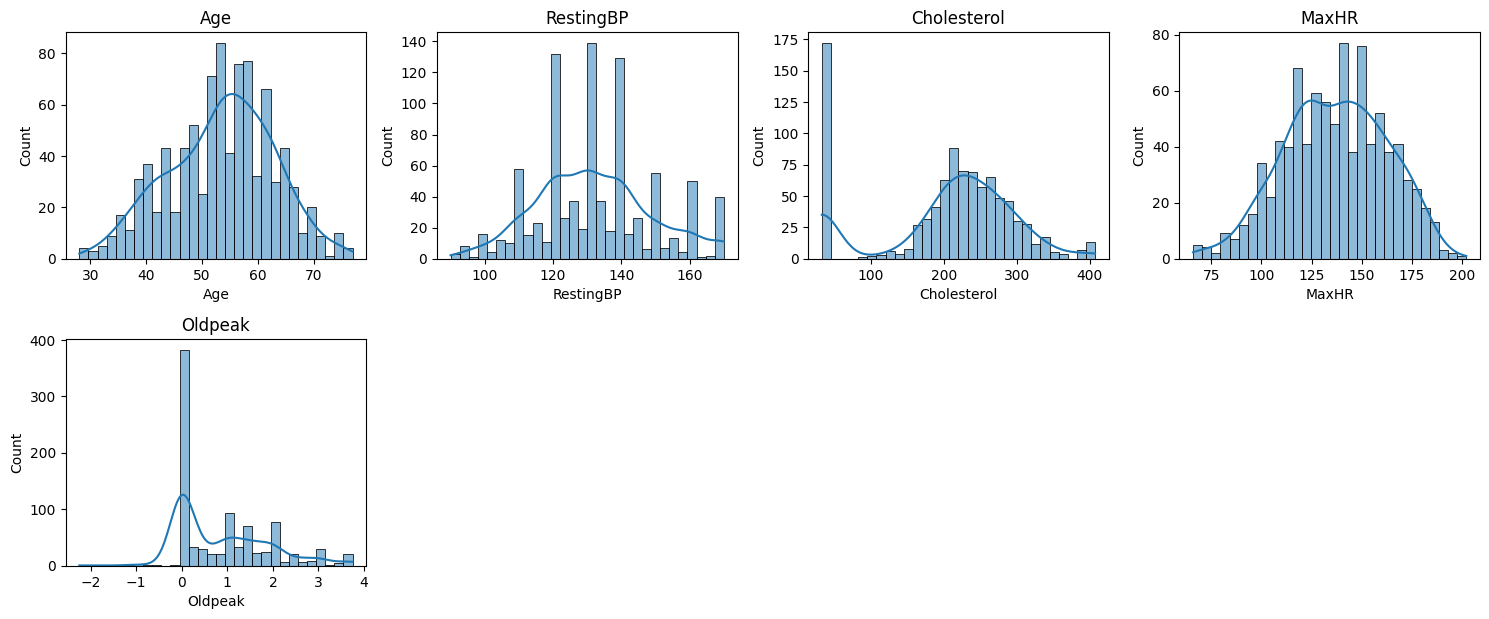

In [24]:
#histogram for the numerical features   (Univariate Analysis)
num_cols = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
plt.figure(figsize=(15,12))
for i ,col in enumerate(X[num_cols].columns):
    plt.subplot(4,4,i+1)
    sns.histplot(X[col],bins=30,kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

## Age
-  The Age distribution is roughly normal, centered around 50–60 years.
-  Most patients in the dataset are middle-aged or older adults, which aligns with typical heart disease demographics.
***Insight***: Age is likely an important predictor — older individuals are at higher risk, but since the distribution is balanced, it won’t bias the model.
## Resting BP
- The majority of people have RestingBP between 120–140, which is the normal-to-mildly elevated range.
- A few cases fall below 100 or above 160 — those are outliers but could represent hypotension or hypertension.
***Insight***: Distribution shows that most subjects are mildly hypertensive, which is expected in heart disease data.
## Cholesterol
- Most people cluster around 200–250 mg/dL, which is the borderline-to-high cholesterol range.

- There’s a small group near 150 and some extending beyond 300, forming a slightly right-skewed distribution.

***Insight***: Since higher cholesterol is a known risk factor, this variable may positively correlate with heart disease.
## Max HR
- This feature follows a normal distribution centered between 120–160 bpm.
- Fewer individuals achieve very high (>180) or low (<90) heart rates.
***Insight***:Normal shape means it’s ready for modeling — no scaling issues.
Lower MaxHR values could be associated with heart disease due to lower cardiovascular efficiency.
## OldPeak
- Highly right-skewed distribution — most people have Oldpeak = 0, meaning no ST depression.
- Only a few cases show high depression (>2), which clinically indicates possible ischemia.
- ***Insight***: Since this is skewed, it might need scaling or transformation.
The presence of even small positive values could strongly correlate with disease presence, so this is a highly predictive feature.

## Interpretation :
From the univariate analysis, we observe that most physiological variables such as Age, RestingBP, Cholesterol, and MaxHR follow approximately normal distributions, while Oldpeak is heavily skewed. These distributions reflect realistic clinical populations — primarily middle-aged adults with borderline cholesterol and blood pressure levels. Features like Oldpeak and Age may have strong influence on heart disease prediction, while skewed variables might need transformation for better model performance.

C:\Users\himan\AppData\Local\Temp\ipykernel_12432\2724826435.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=col,ax=axes[i],order=data[col].value_counts().index,palette='Set2')
C:\Users\himan\AppData\Local\Temp\ipykernel_12432\2724826435.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=col,ax=axes[i],order=data[col].value_counts().index,palette='Set2')
C:\Users\himan\AppData\Local\Temp\ipykernel_12432\2724826435.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=col,ax=axes[i],order=data[col]

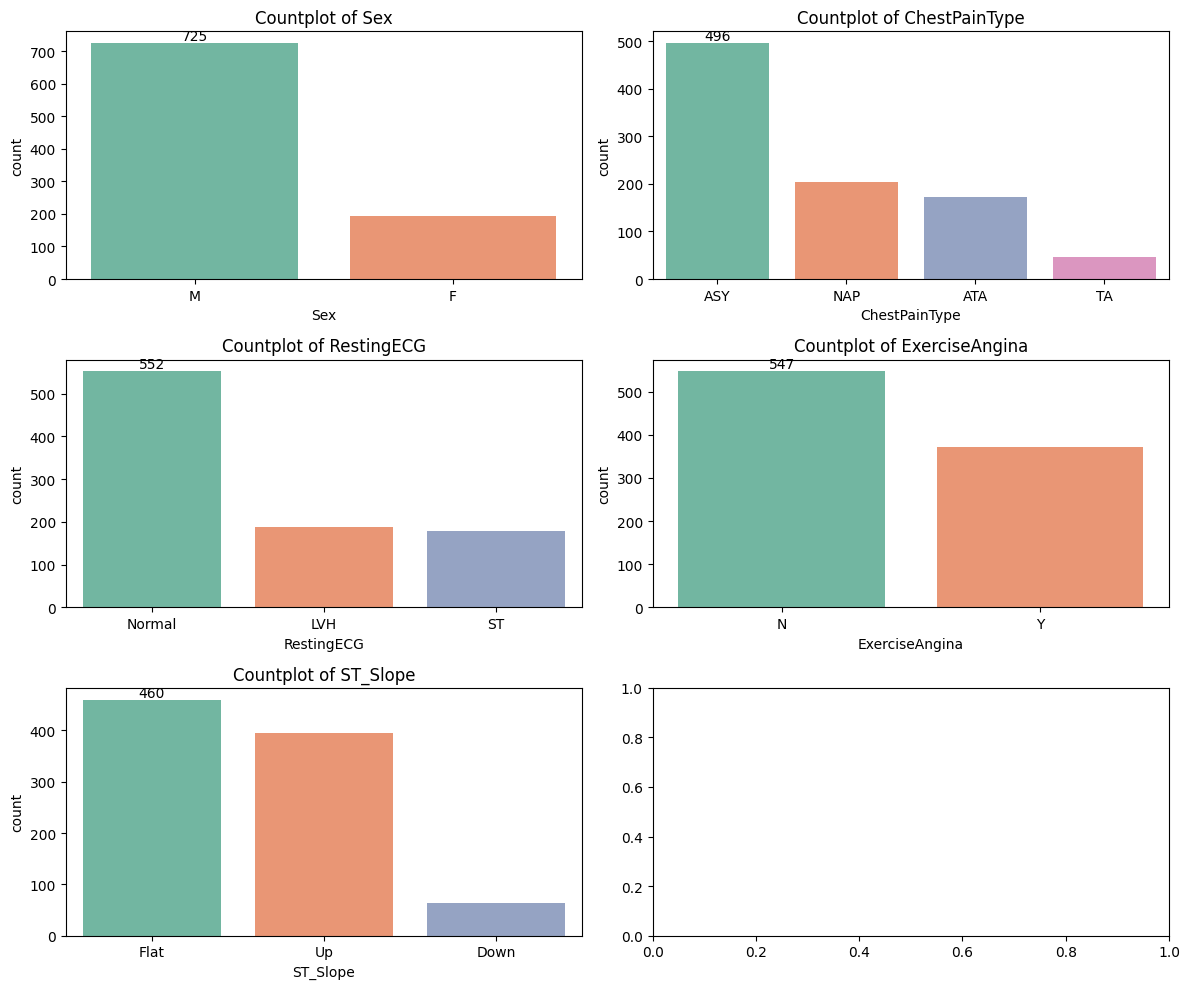

In [25]:
# Countplot for the categorical features (Univariate Analysis) 
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
import seaborn as sns
fig , axes = plt.subplots(3,2,figsize=(12,10))
axes = axes.flatten() 
for i , col in enumerate(cat_cols):
    sns.countplot(data=data,x=col,ax=axes[i],order=data[col].value_counts().index,palette='Set2')
    axes[i].set_title(f'Countplot of {col}')
    axes[i].bar_label(axes[i].containers[0])
plt.tight_layout()
plt.show()

C:\Users\himan\AppData\Local\Temp\ipykernel_12432\3381151887.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='HeartDisease', y=col,data=data,palette='Set2')
C:\Users\himan\AppData\Local\Temp\ipykernel_12432\3381151887.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='HeartDisease', y=col,data=data,palette='Set2')
C:\Users\himan\AppData\Local\Temp\ipykernel_12432\3381151887.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='HeartDisease', y=col,data=data,palette='Set2')
C:\Users\himan\AppData\Local\Temp\ipykernel_12432

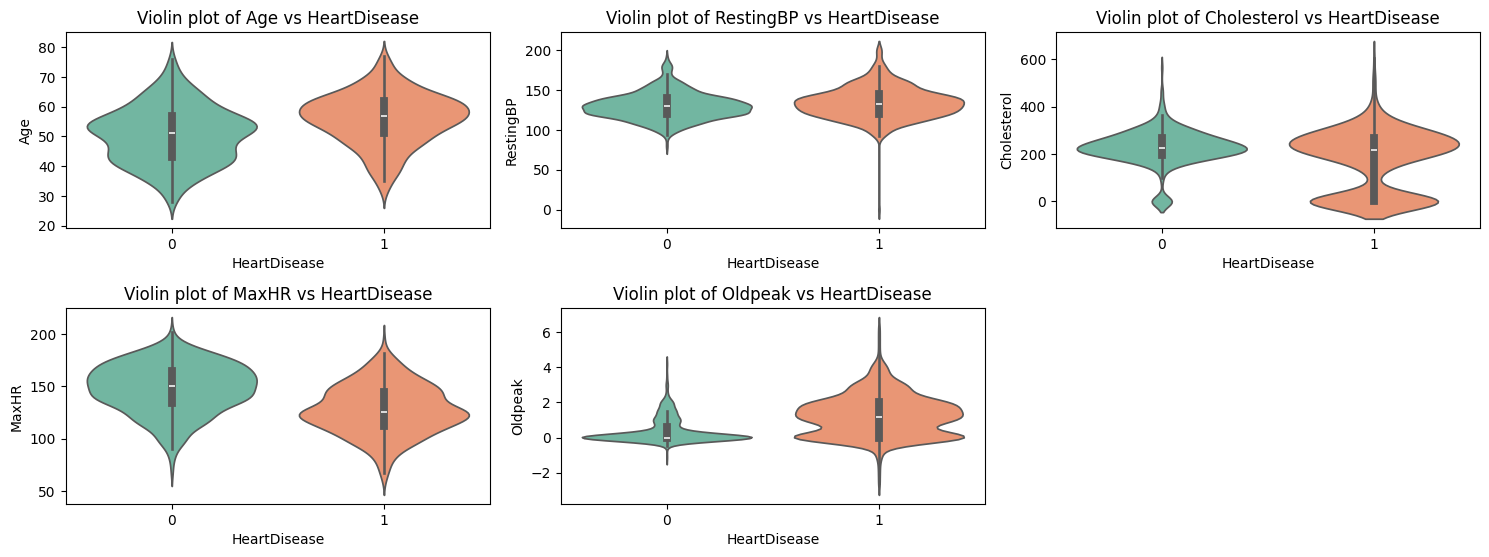

In [26]:
#Bivariate anaylisis for numerical columns
num_cols = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
plt.figure(figsize=(15,8))
for i , col in enumerate(num_cols,1):
    plt.subplot(3,3,i)
    sns.violinplot(x='HeartDisease', y=col,data=data,palette='Set2')
    plt.title(f'Violin plot of {col} vs HeartDisease')

plt.tight_layout()
plt.show()

In [35]:

# sns.pairplot(data[num_cols + ['HeartDisease']] , hue ='HeartDisease' ,palette='Set1',diag_kind='kde')
# plt.show()

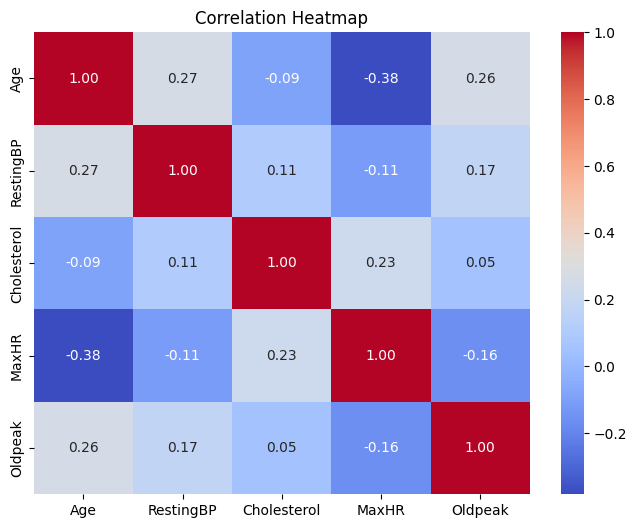

In [27]:
num_cols = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
plt.figure(figsize=(8,6))
sns.heatmap(X[num_cols].corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

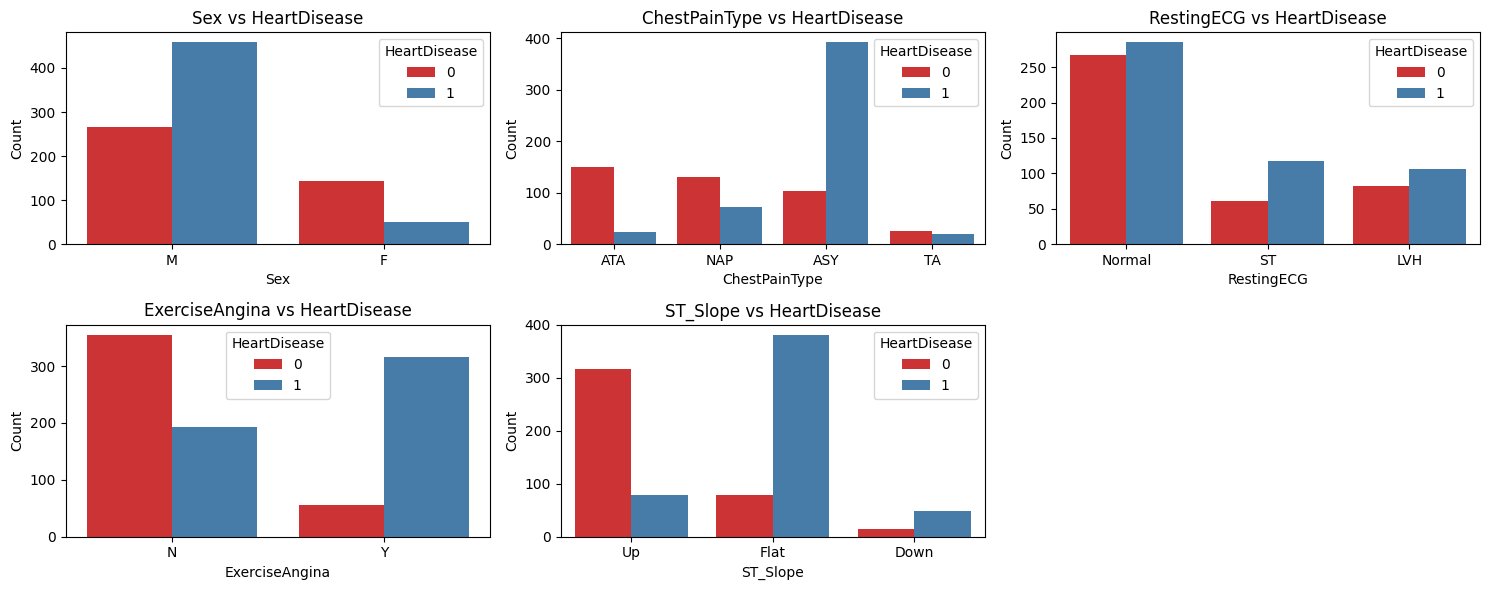

In [28]:
plt.figure(figsize=(15,6))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)   # 2 rows, 3 columns
    sns.countplot(data=X, x=col, hue=y, palette='Set1')
    plt.title(f'{col} vs HeartDisease')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


## Multivariate Analysis

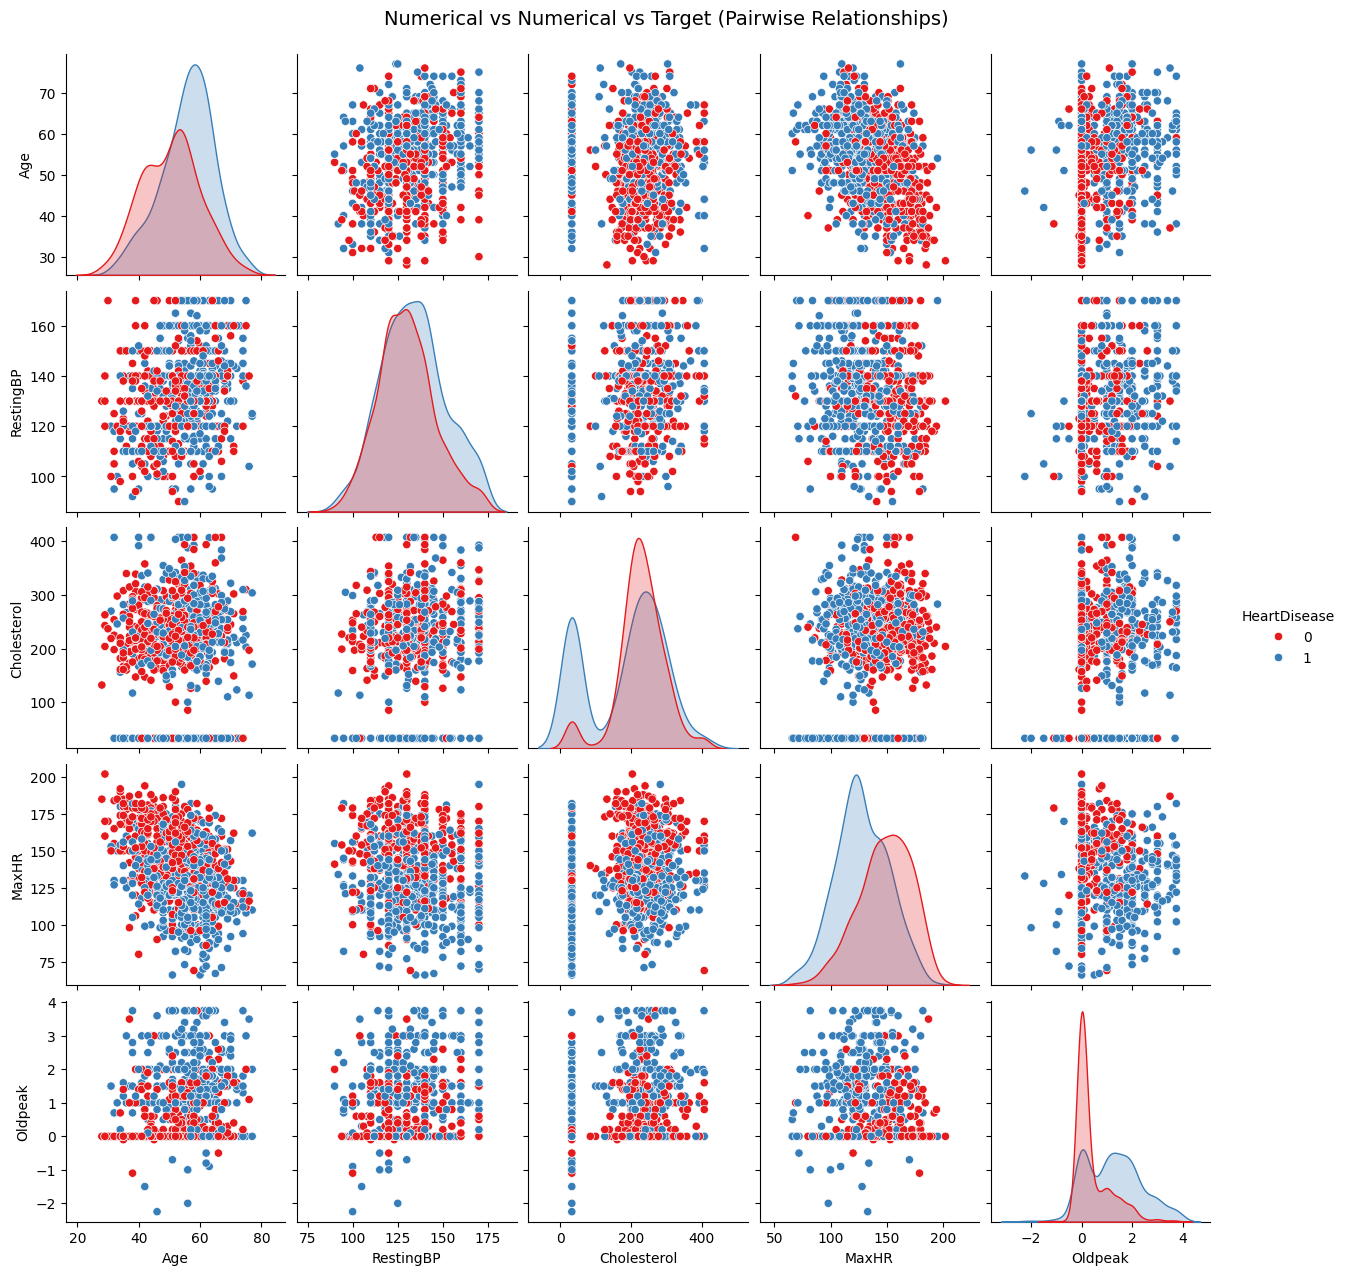

In [29]:
# Numerical + Numerical + Target
df_viz = X.copy()
df_viz = df_viz.drop('FastingBS',axis=1)
df_viz['HeartDisease'] = y 

num_cols = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

sns.pairplot(data=df_viz,hue='HeartDisease',diag_kind='kde',palette='Set1')
plt.suptitle("Numerical vs Numerical vs Target (Pairwise Relationships)",y=1.02,fontsize=14)
plt.show()

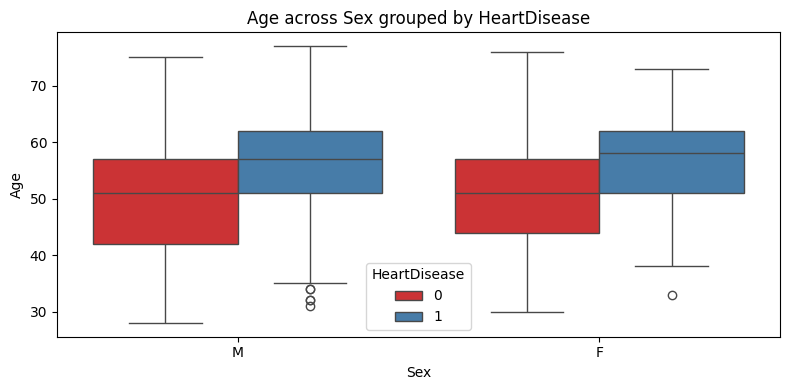

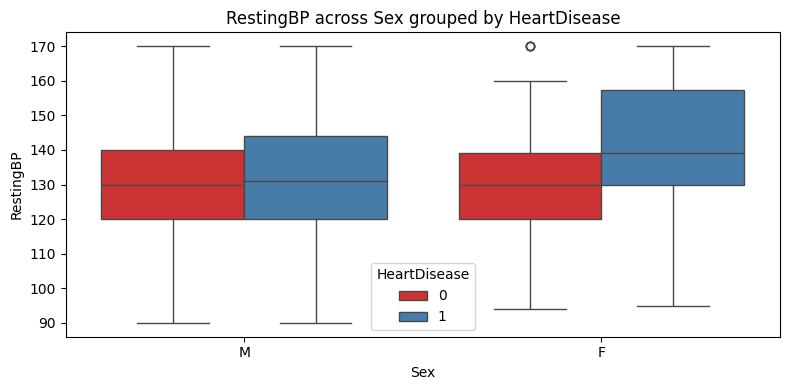

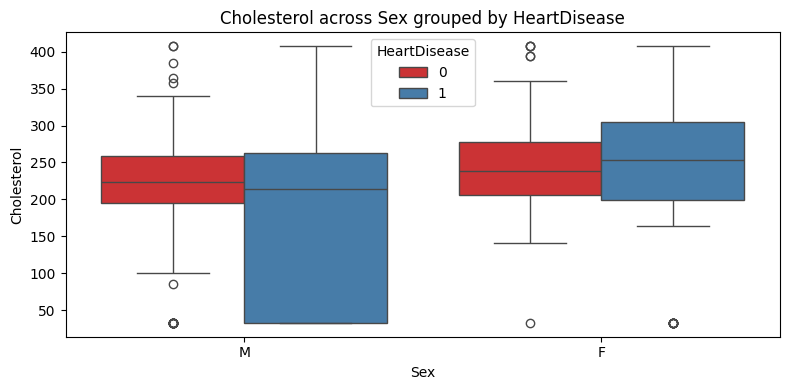

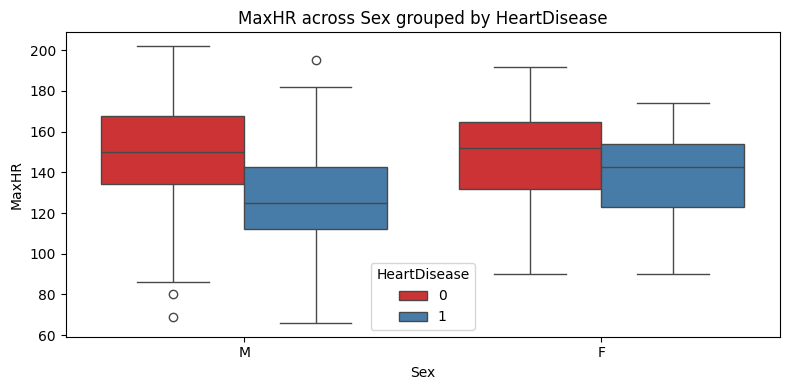

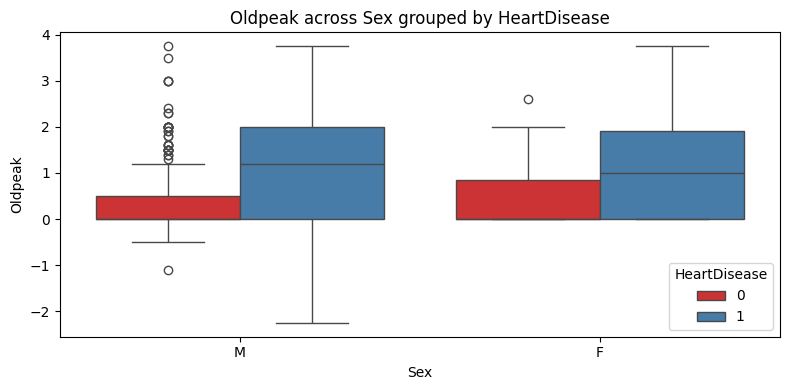

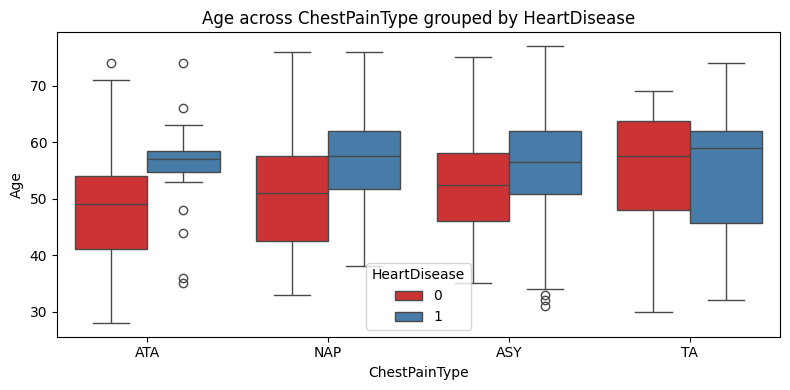

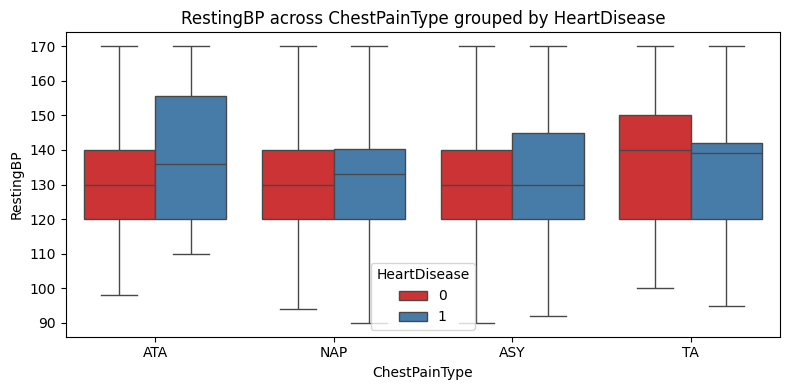

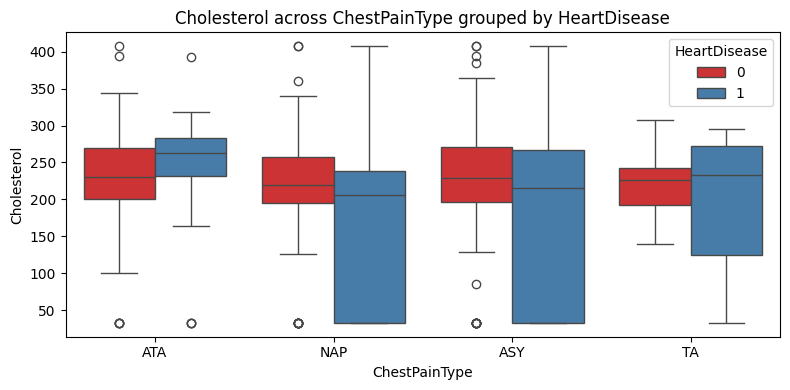

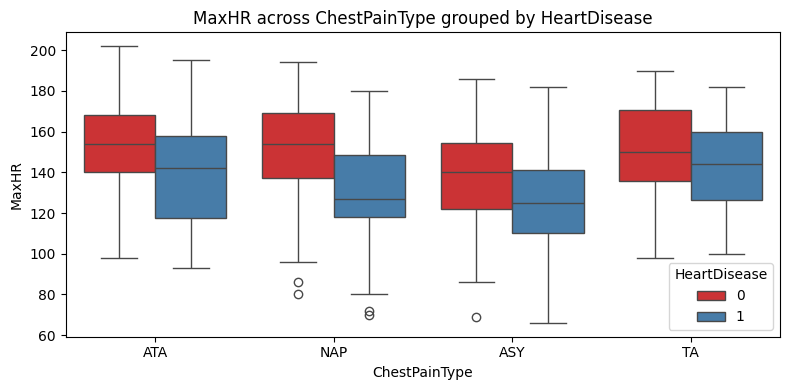

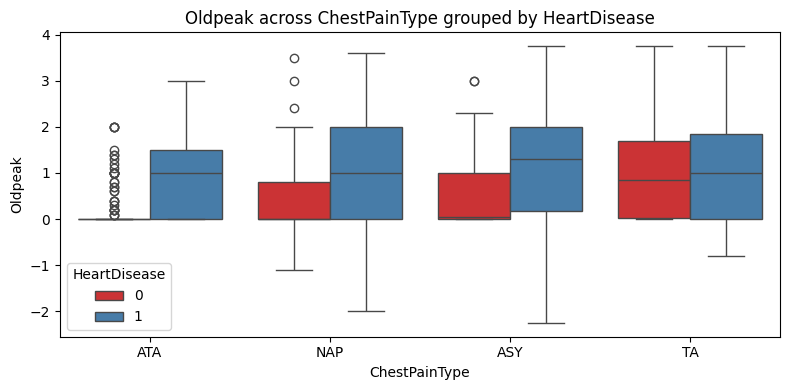

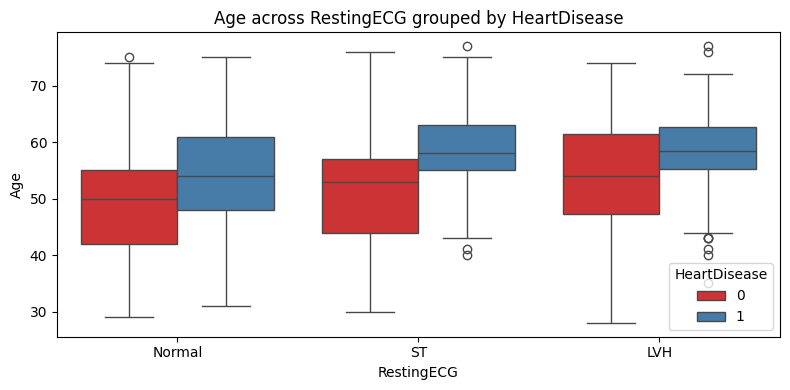

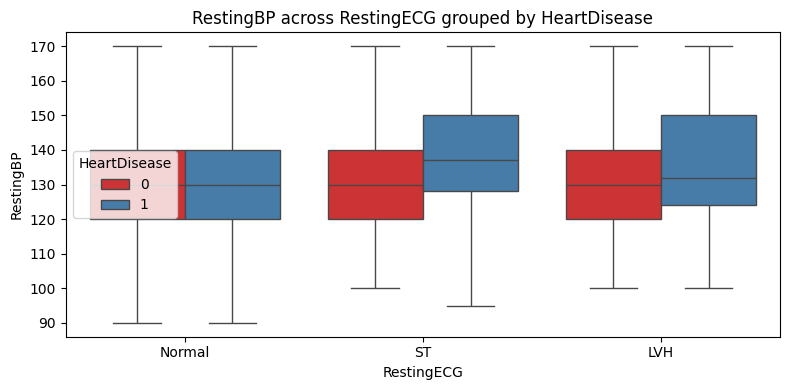

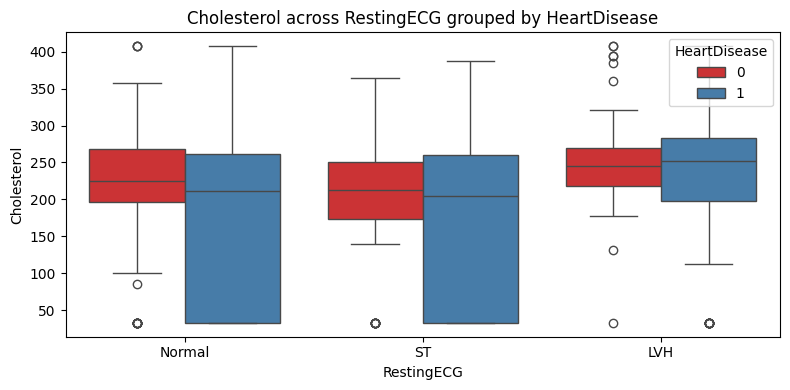

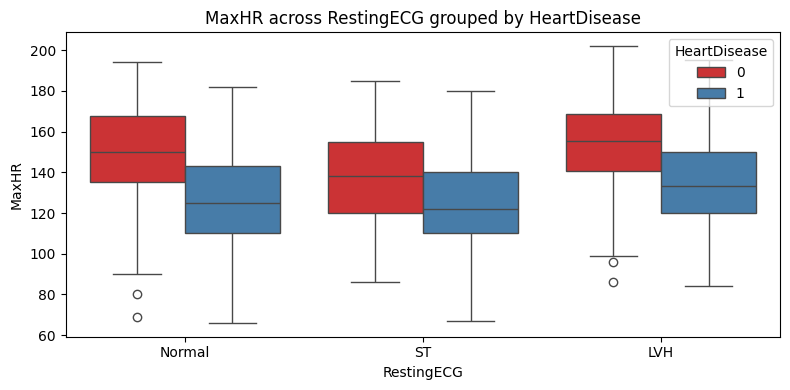

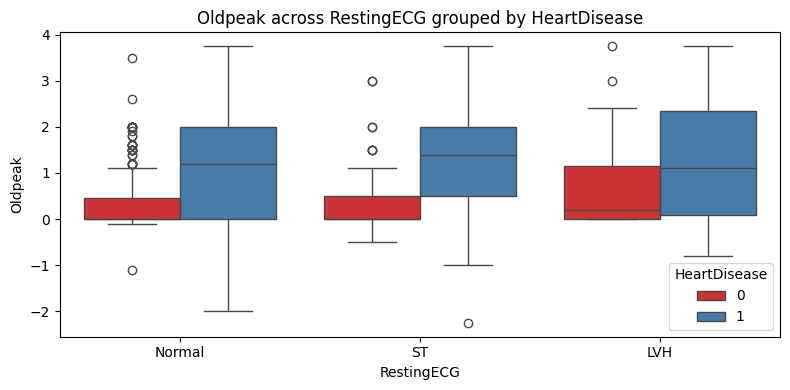

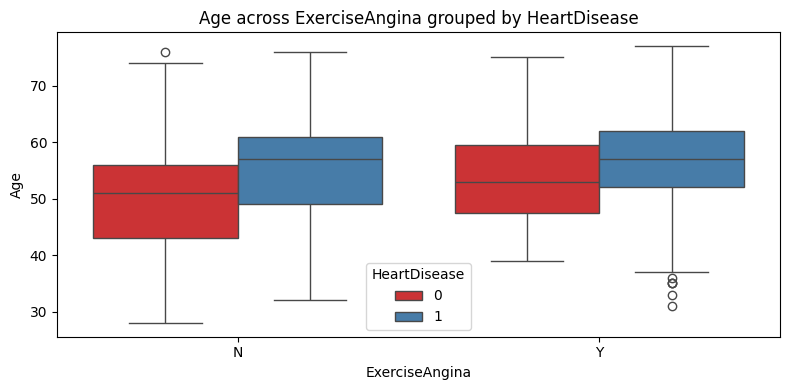

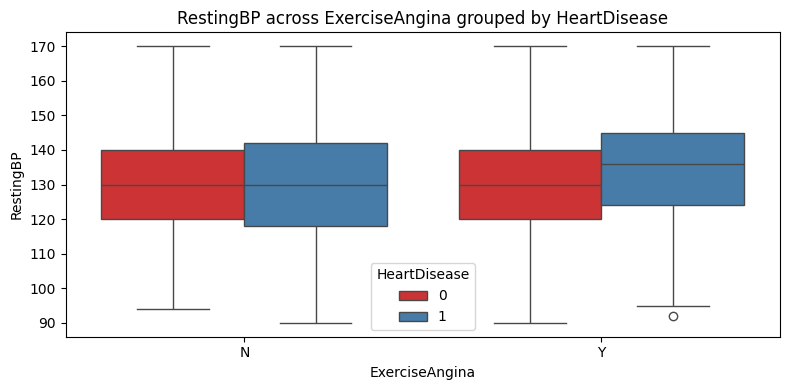

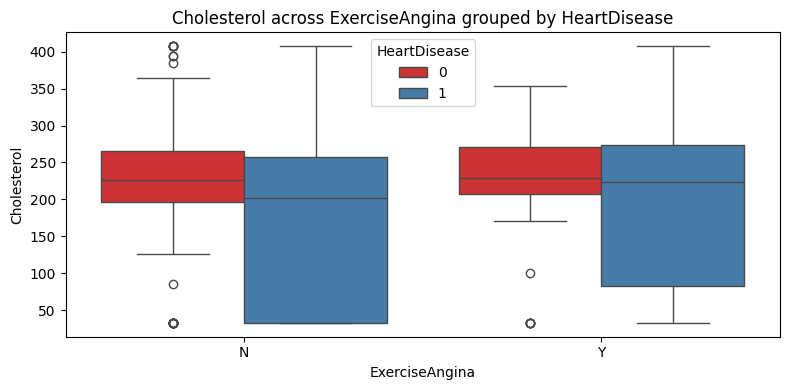

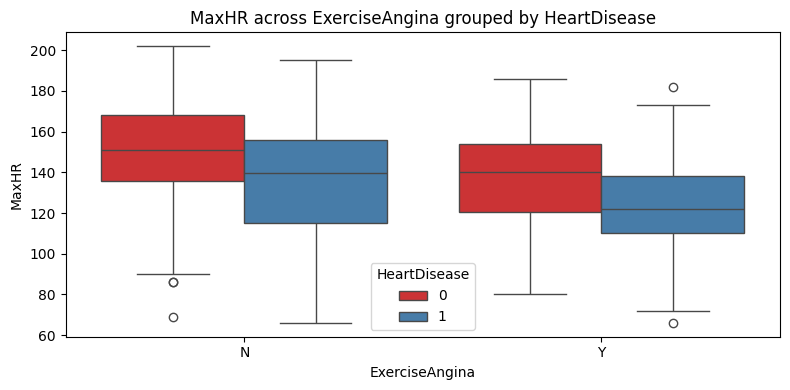

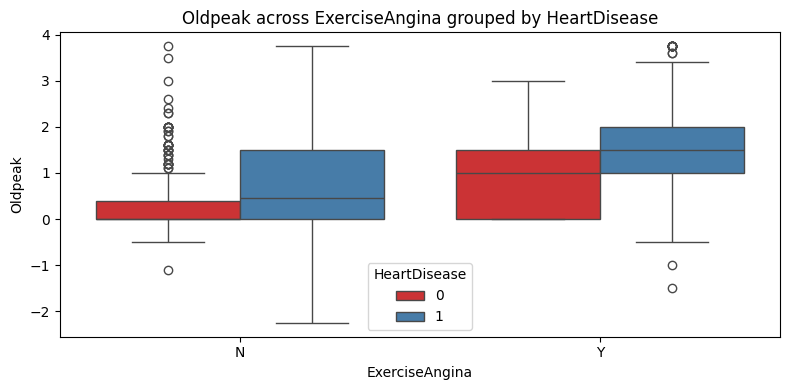

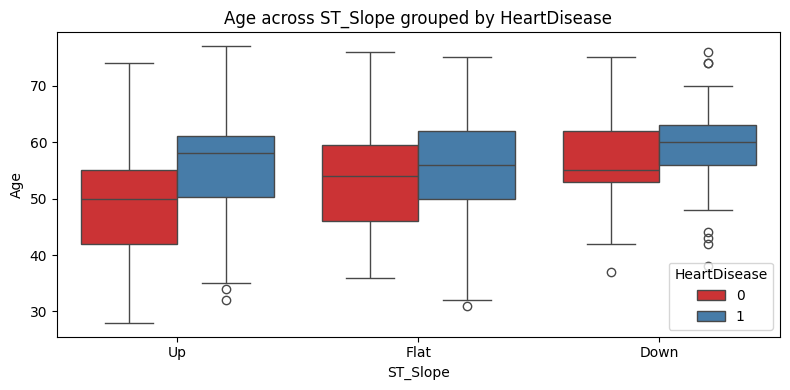

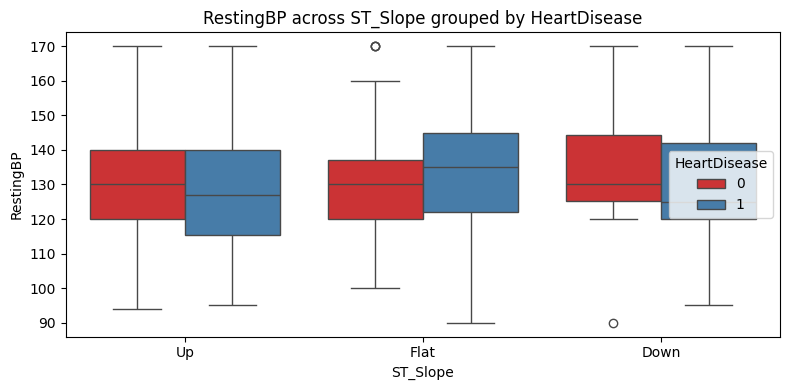

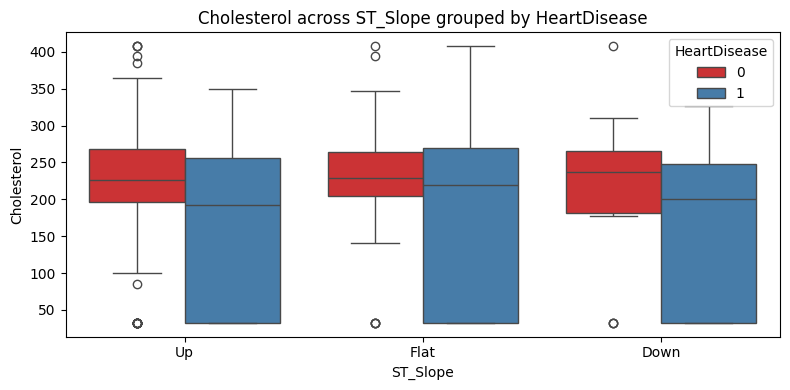

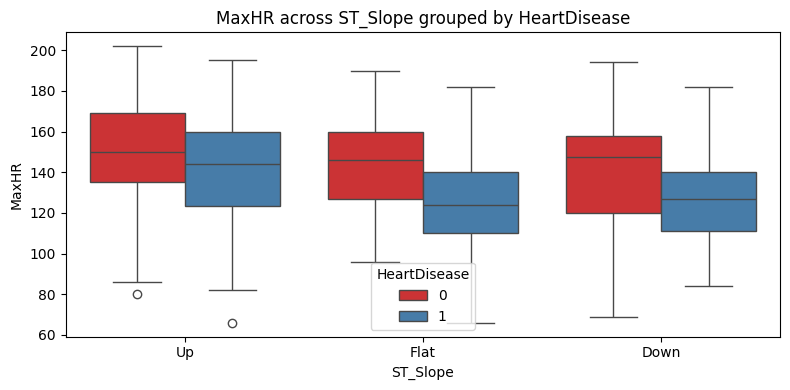

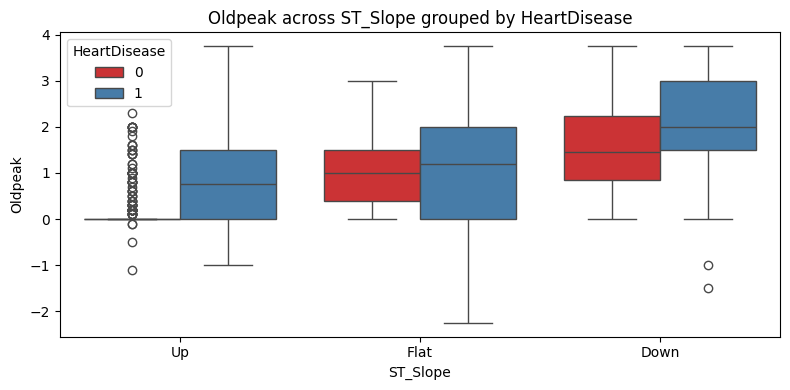

In [30]:
# Numerical + categorical + Target 
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

for cat in cat_cols :
    for num in num_cols :
        plt.figure(figsize=(8,4))
        sns.boxplot(data=df_viz,x=cat,y= num , hue= 'HeartDisease' ,palette='Set1')
        plt.title(f'{num} across {cat} grouped by HeartDisease')
        plt.tight_layout()
        plt.show()

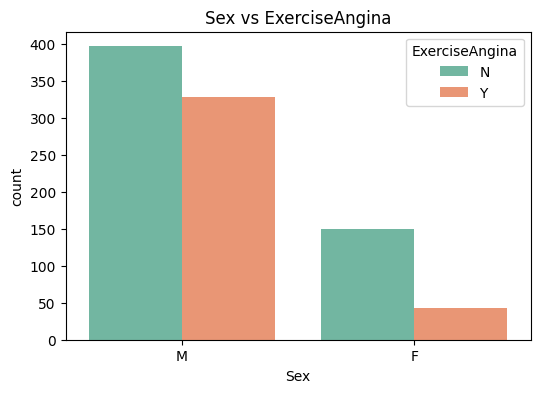

HeartDisease           0     1
Sex ExerciseAngina            
F   N               0.85  0.15
    Y               0.37  0.63
M   N               0.57  0.43
    Y               0.12  0.88

In [31]:
# cat + cat  + target
# Sex vs ExerciseAngina vs HeartDisease
plt.figure(figsize=(6,4))
sns.countplot(data=df_viz, x='Sex', hue='ExerciseAngina', palette='Set2')
plt.title('Sex vs ExerciseAngina')
plt.show()

# With target insight
pd.crosstab([df_viz['Sex'], df_viz['ExerciseAngina']], df_viz['HeartDisease'], normalize='index').round(2)


In [41]:
# data.head()

In [42]:
# data['ST_Slope'].value_counts()

# DATA PREPROCESSING FOR MACHINE LEARNING

In [32]:
# One - Hot Encoding for Ordinal Features

print("\nEncoding Binary Variables Using Label Encoder\n")
binary_cols = ['Sex' ,'ExerciseAngina']
label_encoder = LabelEncoder()
for col in binary_cols :
    X[col] = label_encoder.fit_transform(X[col])
    print(f"Encoding {col} variable ....")

print("\nEncoding Ordinal Variables Using OneHotEnooder\n ")
multi_cols = ['ChestPainType','RestingECG','ST_Slope']

# Onehot Encoder 
# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform only the multi-class categorical columns
encoded_array = onehot_encoder.fit_transform(X[multi_cols])

# Converting encoded data to DataFrame
encoded_df = pd.DataFrame(encoded_array,
                          columns=onehot_encoder.get_feature_names_out(multi_cols),
                          index=X.index)

# Drop the original categorical columns and add the new one-hot encoded ones
X = pd.concat([X.drop(columns=multi_cols), encoded_df], axis=1)
for col in multi_cols:
    print(f'Encoding {col} variable ....')
# Check the encoded dataset
print("\nAFTER PERFORMING ENCODING DATASET TYPE", X.shape)
print('\n')
X.head()



Encoding Binary Variables Using Label Encoder

Encoding Sex variable ....
Encoding ExerciseAngina variable ....

Encoding Ordinal Variables Using OneHotEnooder
 
Encoding ChestPainType variable ....
Encoding RestingECG variable ....
Encoding ST_Slope variable ....

AFTER PERFORMING ENCODING DATASET TYPE (918, 15)




,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40.0,1,140.0,289.0,0,172.0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,49.0,0,160.0,180.0,0,156.0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,37.0,1,130.0,283.0,0,98.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,48.0,0,138.0,214.0,0,108.0,1,1.5,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54.0,1,150.0,195.0,0,122.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [33]:
print("\n=================================================================================")
print("\nSCALING FEATURES BY STANDARD SCALER")
print("\n=================================================================================")
from sklearn.preprocessing import StandardScaler

num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

print("\nFeatures scaled using StandardScaler\n")
X.head()



SCALING FEATURES BY STANDARD SCALER


Features scaled using StandardScaler



,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,1,0.463654,0.886771,0,1.384080,0,-0.851276,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.478484,0,1.641229,-0.250184,0,0.754610,0,0.118532,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-1.751359,1,-0.125133,0.824187,0,-1.527219,0,-0.851276,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.584556,0,0.345897,0.104463,0,-1.133801,1,0.603436,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.051881,1,1.052442,-0.093722,0,-0.583014,0,-0.851276,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [34]:
X.shape

(918, 15)

In [35]:
print("\n=================================================================================")
print("\nSPLITTING DATA INTO TRAIN AND TESTS SETS")
print("\n=================================================================================")
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size=0.2 , random_state = 42 ,stratify=y )
print(f"\nFeature matrix shape: {X.shape}")
print(f"\nTarget vector shape: {y.shape}")



SPLITTING DATA INTO TRAIN AND TESTS SETS


Feature matrix shape: (918, 15)

Target vector shape: (918,)


# Statistical Modeling & Machine Learning¶

## Models to Train: 

- **LOGISTIC REGRESSION**-Baseline Linear Model
- **K-NEAREST NEIGHBORS(KNN)**-Instance-based learning
- **NAIVE BAYES**-Probabilistic classifier
- **SUPPORT VECTOR MACHINE(SVM)**-Kernel-based classifier
- **DECISION TREE**-
- **RANDOM FOREST**-
- **EXTRATREES CLASSIFIER**-
- **XGBOOST**-
- **GRADIENT BOOSTING**-
- **ADABOOST**-

In [36]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("\n=================================================================================")
print("\nTRAINING MULTIPLE MACHINE LEARNING MODELS")
print("\n=================================================================================")

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(kernel='rbf', random_state=42, probability=True),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1),
    'XGBOOST': XGBClassifier(n_estimators=100, max_depth=5, random_state=42, n_jobs=-1, learning_rate=0.1, eval_metric='logloss'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42, learning_rate=0.1),
    'Adaboost': AdaBoostClassifier(random_state=42)
}

print("\nTraining in progress...\n")

# Storage for results
results = []
trained_models = {}

for name, model in models.items():
    print(f"{'='*70}")
    print(f"Training: {name}")
    print(f"{'='*70}")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Probability predictions (for AUC)
    if hasattr(model, "predict_proba"):
        y_pred_proba_test = model.predict_proba(X_test)[:, 1]
    else:
        # For models like SVM without predict_proba=False
        try:
            y_pred_proba_test = model.decision_function(X_test)
        except:
            y_pred_proba_test = np.zeros_like(y_pred_test)
    
    # Metrics - Training
    train_acc = accuracy_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    
    # Metrics - Test
    test_acc = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_proba_test)
    
    # Store results
    results.append({
        'Model': name,
        'Train_Accuracy': train_acc,
        'Test_Accuracy': test_acc,
        'Test_Precision': test_precision,
        'Test_Recall': test_recall,
        'Test_F1': test_f1,
        'Test_AUC': test_auc,
    })
    
    # Store trained model
    trained_models[name] = {
        'model': model,
        'predictions': y_pred_test,
        'probabilities': y_pred_proba_test
    }
    
    # Print results
    print(f"   Training Performance:")
    print(f"      Accuracy:  {train_acc:.4f}")
    print(f"      Precision: {train_precision:.4f}")
    print(f"      Recall:    {train_recall:.4f}")
    print(f"      F1-Score:  {train_f1:.4f}")
    print(f"\n   Test Performance:")
    print(f"      Accuracy:  {test_acc:.4f}")
    print(f"      Precision: {test_precision:.4f}")
    print(f"      Recall:    {test_recall:.4f}")
    print(f"      F1-Score:  {test_f1:.4f}")
    print(f"      AUC-ROC:   {test_auc:.4f}")
    print(f"\n   Overfitting Gap: {train_acc - test_acc:.4f}")
    
    if train_acc - test_acc < 0.05:
        print(f"Good generalization!")
    elif train_acc - test_acc < 0.15:
        print(f"Moderate overfitting")
    else:
        print(f"High overfitting detected")
    print()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Sort by F1-score
results_df = results_df.sort_values(by='Test_F1', ascending=False).reset_index(drop=True)

print("\n=================================================================================")
print("MODEL COMPARISON SUMMARY")
print("=================================================================================\n")
print(results_df)

# Display top performing model
best_model_name = results_df.iloc[0]['Model']
print(f"\nBest Performing Model: {best_model_name}")




TRAINING MULTIPLE MACHINE LEARNING MODELS


Training in progress...

Training: Logistic Regression
   Training Performance:
      Accuracy:  0.8651
      Precision: 0.8681
      Recall:    0.8916
      F1-Score:  0.8797

   Test Performance:
      Accuracy:  0.8859
      Precision: 0.8716
      Recall:    0.9314
      F1-Score:  0.9005
      AUC-ROC:   0.9317

   Overfitting Gap: -0.0207
Good generalization!

Training: SVM
   Training Performance:
      Accuracy:  0.8924
      Precision: 0.8776
      Recall:    0.9360
      F1-Score:  0.9058

   Test Performance:
      Accuracy:  0.9022
      Precision: 0.8889
      Recall:    0.9412
      F1-Score:  0.9143
      AUC-ROC:   0.9409

   Overfitting Gap: -0.0098
Good generalization!

Training: Decision Tree
   Training Performance:
      Accuracy:  1.0000
      Precision: 1.0000
      Recall:    1.0000
      F1-Score:  1.0000

   Test Performance:
      Accuracy:  0.7717
      Precision: 0.7830
      Recall:    0.8137
      F1-Score:  0

In [139]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', random_state=42, probability=True)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print('\n SVM \n')
print('Accuracy Score is :',accuracy_score(y_test,y_pred))
print('Precision Score :',precision_score(y_test,y_pred))
print("Recall score :",recall_score(y_test,y_pred))
print('F1_score :',f1_score(y_test,y_pred))
print('roc_auc_score :',roc_auc_score(y_test,y_pred))
print('confusion_matrix :\n',confusion_matrix(y_test,y_pred))
print('classification_report :\n',classification_report(y_test,y_pred))


 SVM 

Accuracy Score is : 0.9021739130434783
Precision Score : 0.8888888888888888
Recall score : 0.9411764705882353
F1_score : 0.9142857142857143
roc_auc_score : 0.8974175035868005
confusion_matrix :
 [[70 12]
 [ 6 96]]
classification_report :
               precision    recall  f1-score   support

           0       0.92      0.85      0.89        82
           1       0.89      0.94      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



In [326]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print('Accuracy Score is :',accuracy_score(y_test,y_pred))
print('Precision Score :',precision_score(y_test,y_pred))
print("Recall score :",recall_score(y_test,y_pred))
print('F1_score :',f1_score(y_test,y_pred))
print('roc_auc_score :',roc_auc_score(y_test,y_pred))
print('confusion_matrix :\n',confusion_matrix(y_test,y_pred))
print('classification_report :\n',classification_report(y_test,y_pred))

Accuracy Score is : 0.7717391304347826
Precision Score : 0.7830188679245284
Recall score : 0.8137254901960784
F1_score : 0.7980769230769231
roc_auc_score : 0.7666188426590148
confusion_matrix :
 [[59 23]
 [19 83]]
classification_report :
               precision    recall  f1-score   support

           0       0.76      0.72      0.74        82
           1       0.78      0.81      0.80       102

    accuracy                           0.77       184
   macro avg       0.77      0.77      0.77       184
weighted avg       0.77      0.77      0.77       184



In [150]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print('\n RANDOM FOREST CLASSIFIER \n')
print('Accuracy Score is :',accuracy_score(y_test,y_pred))
print('Precision Score :',precision_score(y_test,y_pred))
print("Recall score :",recall_score(y_test,y_pred))
print('F1_score :',f1_score(y_test,y_pred))
print('roc_auc_score :',roc_auc_score(y_test,y_pred))
print('confusion_matrix :\n',confusion_matrix(y_test,y_pred))
print('classification_report :\n',classification_report(y_test,y_pred))


 RANDOM FOREST CLASSIFIER 

Accuracy Score is : 0.875
Precision Score : 0.8761904761904762
Recall score : 0.9019607843137255
F1_score : 0.8888888888888888
roc_auc_score : 0.8717120994739359
confusion_matrix :
 [[69 13]
 [10 92]]
classification_report :
               precision    recall  f1-score   support

           0       0.87      0.84      0.86        82
           1       0.88      0.90      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184



In [142]:
X.columns

Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [143]:
rf.feature_importances_

array([0.0764394 , 0.03744696, 0.06813502, 0.09195633, 0.02602041,
       0.09858665, 0.07458718, 0.11209901, 0.04658247, 0.03184777,
       0.01004569, 0.01471855, 0.00981776, 0.12853294, 0.17318386])

In [144]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, max_depth=5, 
                                                    random_state=42, learning_rate=0.1)
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
print('Accuracy Score is :',accuracy_score(y_test,y_pred))
print('Precision Score :',precision_score(y_test,y_pred))
print("Recall score :",recall_score(y_test,y_pred))
print('F1_score :',f1_score(y_test,y_pred))
print('roc_auc_score :',roc_auc_score(y_test,y_pred))
print('confusion_matrix :\n',confusion_matrix(y_test,y_pred))
print('classification_report :\n',classification_report(y_test,y_pred))

Accuracy Score is : 0.875
Precision Score : 0.898989898989899
Recall score : 0.8725490196078431
F1_score : 0.8855721393034826
roc_auc_score : 0.8752989000478241
confusion_matrix :
 [[72 10]
 [13 89]]
classification_report :
               precision    recall  f1-score   support

           0       0.85      0.88      0.86        82
           1       0.90      0.87      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



In [145]:
xgb = XGBClassifier(n_estimators=100, max_depth=5, 
                                     random_state=42, n_jobs=-1, 
                                     learning_rate=0.1, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print('Accuracy Score is :',accuracy_score(y_test,y_pred))
print('Precision Score :',precision_score(y_test,y_pred))
print("Recall score :",recall_score(y_test,y_pred))
print('F1_score :',f1_score(y_test,y_pred))
print('roc_auc_score :',roc_auc_score(y_test,y_pred))
print('confusion_matrix :\n',confusion_matrix(y_test,y_pred))
print('classification_report :\n',classification_report(y_test,y_pred))

Accuracy Score is : 0.8695652173913043
Precision Score : 0.8823529411764706
Recall score : 0.8823529411764706
F1_score : 0.8823529411764706
roc_auc_score : 0.8680057388809183
confusion_matrix :
 [[70 12]
 [12 90]]
classification_report :
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        82
           1       0.88      0.88      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



In [146]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print('Accuracy Score is :',accuracy_score(y_test,y_pred))
print('Precision Score :',precision_score(y_test,y_pred))
print("Recall score :",recall_score(y_test,y_pred))
print('F1_score :',f1_score(y_test,y_pred))
print('roc_auc_score :',roc_auc_score(y_test,y_pred))
print('confusion_matrix :\n',confusion_matrix(y_test,y_pred))
print('classification_report :\n',classification_report(y_test,y_pred))

Accuracy Score is : 0.8913043478260869
Precision Score : 0.9019607843137255
Recall score : 0.9019607843137255
F1_score : 0.9019607843137255
roc_auc_score : 0.8900047824007652
confusion_matrix :
 [[72 10]
 [10 92]]
classification_report :
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        82
           1       0.90      0.90      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

